<a href="https://colab.research.google.com/github/uniswan/test12/blob/master/SGD1%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import tensorflow as tf

In [0]:
def synthetic_data(w,b,num_examples):
    x = np.random.normal(0,1,(num_examples, len(w)))
    y = np.dot(x,w) + b
    y += np.random.normal(0, 0.0, y.shape)
    return x, y

true_w = np.array([2,-3.4]) 
true_b = 4.2    
features, labels = synthetic_data(true_w, true_b,1000)

In [0]:
import matplotlib.pyplot as plt


In [60]:
import torch
import torch.nn as nn
x,y = torch. from_numpy(features).float(), torch.from_numpy(labels).float().reshape(-1,1)
print(x.shape, y.shape)

torch.mean(x)

torch.Size([1000, 2]) torch.Size([1000, 1])


tensor(-0.0127)

In [0]:
from torch.utils.data import TensorDataset, DataLoader

def load_array(date_arrays, batch_size, is_train = True):
    dataset = TensorDataset(*date_arrays)
    dataloader = DataLoader(dataset = dataset,batch_size = batch_size, shuffle= is_train)

    return dataloader

In [62]:
batch_size = 10
data_iter = load_array((x,y), batch_size)

for x,y in data_iter:
    print(x)
    print(y)
    break

tensor([[ 0.4769,  1.1811],
        [-0.6070,  0.1589],
        [-1.2986,  0.7265],
        [ 1.4466,  0.7487],
        [-0.3062, -0.0453],
        [-0.3733, -0.8406],
        [ 0.1332, -1.2001],
        [-0.9697,  0.2671],
        [-1.2811,  0.8865],
        [-0.5640,  0.3749]])
tensor([[ 1.1380],
        [ 2.4457],
        [-0.8672],
        [ 4.5476],
        [ 3.7418],
        [ 6.3114],
        [ 8.5468],
        [ 1.3525],
        [-1.3763],
        [ 1.7976]])


In [0]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.layer = torch.nn.Linear(2,1,bias = True)

    def forward(self, inputs):
        outputs = self.layer(inputs)
        return outputs

model = LinearRegressionModel()

In [77]:
print(model.layer.weight.data)
print(model.layer.bias.data)

tensor([[-0.2937, -0.4561]])
tensor([0.4747])


In [0]:
import torch.optim as optim


In [0]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch. optim.Adam(model.parameters(), lr = 0.03)


epoch:1, loss:68.68400573730469
epoch:2, loss:12.670133590698242
epoch:3, loss:0.16057537496089935
epoch:4, loss:0.01119290478527546
epoch:5, loss:4.804879063158296e-05
epoch:6, loss:1.3490564754192746e-07
epoch:7, loss:9.824283608850237e-10
epoch:8, loss:2.3875657007010886e-10
epoch:9, loss:2.3076296429280774e-10
epoch:10, loss:2.6569058064751516e-10


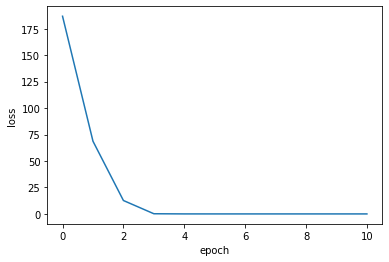

In [66]:
num_epochs = 10
loss_graph = []
loss_graph.append(criterion(model(x),y))

for epoch in range(num_epochs):
    for x, y in data_iter:
        predict = model(x)
        loss = criterion(predict, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_epoch = criterion(model(x),y)
    loss_graph.append(loss_epoch)
    print("epoch:{}, loss:{}".format(epoch+1, loss_epoch))

plt.plot(loss_graph);
plt.xlabel("epoch") 
plt.ylabel("loss")
plt.show()   

In [67]:
weight = model.layer.weight.detach().numpy()
bias = model.layer.bias.detach().numpy()

print("esti_w = {}".format(weight))
print("esti_b = {}".format(bias))

'''real 2, -3.4 , 4.2 very close!!'''

esti_w = [[ 2.        -3.3999977]]
esti_b = [4.199995]


'real 2, -3.4 , 4.2 very close!!'